In [ ]:
# Ver dicas para transformação BOX-COX com Auto-Arima - exemplo completo
# https://alkaline-ml.com/pmdarima/usecases/sun-spots.html

In [ ]:
# RMSE / R2
# https://ivanildo-batista13.medium.com/autoarima-em-python-26303d650de3

# https://alkaline-ml.com/pmdarima/auto_examples/arima/example_auto_arima.html

In [ ]:
# Fonte: Prof Fernando Amaral

# https://www.youtube.com/watch?v=ccupZdvYCn4

In [ ]:
# Versão ajustada para Treino/Teste

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 21,6

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_excel('/content/DataFrame_Processos_Percentual_Base_CompletaAjusteOutLiers.xlsx')
df.Dtinicio = pd.to_datetime(df.DiaInicio)
df.set_index('DiaInicio', inplace=True)
df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,DtHoraInicio,DtHoraFim,Processo,TempoMinutos,TempoMinutosInicioExecucao
DiaInicio,,,,,
2021-01-05,2021-01-05 05:21:00,2021-01-05 07:40:00,Rotina_01,139,321.0
2021-01-06,2021-01-06 04:13:00,2021-01-06 05:54:00,Rotina_01,101,253.0
2021-01-07,2021-01-07 03:30:00,2021-01-07 05:24:00,Rotina_01,114,210.0


In [ ]:
# Filtra somente pelo Processo 04 - caso de uso para avaliação em questão
# Foi o que a princípio apresentou lentidão ao rodar em concorrência com o Processo 01
df = df.loc[df['Processo']=='Rotina_04'] #--> este é o correto

#### apenas para testes - fazer com base menor
#df = df.loc[(df['Processo']=='Rotina_04') & (df['DtHoraInicio']>='2021-09-01')]
#### apenas para testes

coluna = 'TempoMinutosInicioExecucao' # 'TempoMinutos' / 'TempoMinutosInicioExecucao'

# Cria Dataframe somente com as colunas que interessam
df = pd.DataFrame(df, columns = [coluna])
df.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-01-05,164.0
2021-01-06,136.0
2021-01-07,267.0


In [ ]:
# PADRONIZAÇÃO
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Padronização a ser passada para o DataFrame
scaler.fit(df)
scaled_train = scaler.transform(df)

In [ ]:
scaled_train[:3]

array([[0.09571345],
       [0.07927187],
       [0.15619495]])

In [ ]:
# Atualiza DataFrame com Padronização
df[coluna] = scaled_train

In [ ]:
df.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-01-05,0.095713
2021-01-06,0.079272
2021-01-07,0.156195


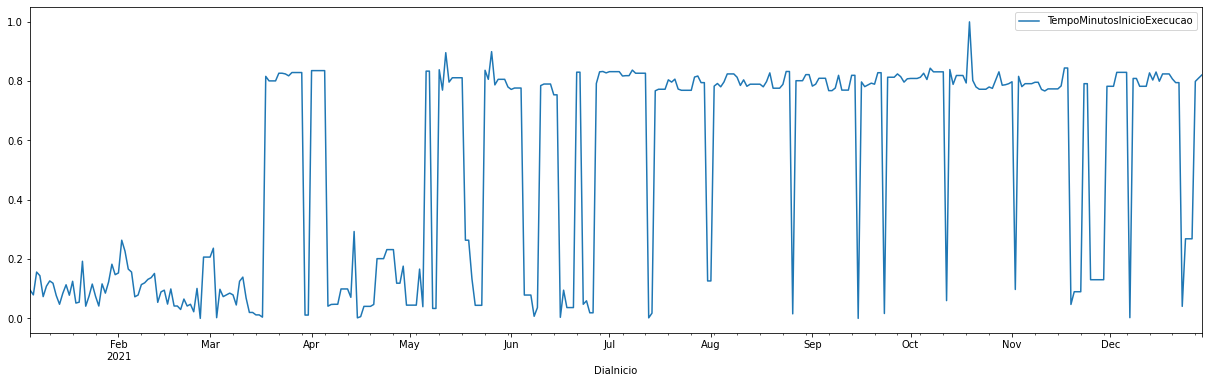

In [ ]:
df.plot()

In [ ]:
# Para voltar o valor
scaler.inverse_transform(df[:3])

array([[164.],
       [136.],
       [267.]])

In [ ]:
# Define tamanho da base
tamanho_base = df.count() # 359 linhas

In [ ]:
# Define tamanho base Treino e Teste - usaremos inicialmente 2/3 para treinar e 1/3 para testar
train_size = int(tamanho_base * 2 / 3)
train_size

239

In [ ]:
# Define bases de treino
train_set = df[:train_size]
train_set.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-01-05,0.095713
2021-01-06,0.079272
2021-01-07,0.156195


In [ ]:
# Define bases de teste
test_set = df[train_size:]
test_set.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-09-01,0.783324
2021-09-02,0.789783
2021-09-03,0.809748


In [ ]:
# EXECUTAR AUTO-ARIMA

In [ ]:
# Com stepwise=True
train_model = auto_arima(train_set, start_p=0, start_q=0, max_p=7, max_q=11, m=12, start_P=0, seasonal=True,d=1,D=1,trace=True,error_action='ignore', suppress_warnings=True, stepwise=True, return_valid_fits=False)
# trace é para visualizar a saída
# return_valid_fits=False --> se colocar True irá retornar uma matriz com todo modelos válidos, com False retorna apenas o melhor

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=1.90 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=167.476, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=98.330, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.46 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=168.713, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=61.837, Time=0.69 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.93 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=61.131, Time=0.41 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=97.116, Time=0.13 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=4.56 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=60.427, Time=0.77 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=97.688, Time=0.26 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=4.52 sec
 

In [ ]:
train_model.aic()

38.29412333447719

In [ ]:
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  239
Model:             SARIMAX(1, 1, 2)x(2, 1, [], 12)   Log Likelihood                 -13.147
Date:                             Sat, 06 Aug 2022   AIC                             38.294
Time:                                     18:22:57   BIC                             58.817
Sample:                                          0   HQIC                            46.576
                                             - 239                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4286      0.115      3.738      0.000       0.204       0.653
ma.L1         -0.5930      0.116     -5.115      0.000      -0.820      -0.366
ma.L2         -0.2462      0.075     -3.293      0.001      -0.393      -0.100
ar.S.L12      -0.7335      0.055    -13.246      0.000      -0.842      -0.625
ar.S.L24      -0.4128      0.056     -7.382      0.000      -0.522      -0.303
sigma2         0.0632      0.004     15.353      0.000       0.055       0.071
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               151.80
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# CALCULAR RMSE - Avaliação do modelo
# Abaixo temos duas métricas de avaliação : o RMSE e R². A primeira é mais usada para 
# comparar entre vários modelos, onde o melhor modelo é aquele cujo valor dessa métrica 
# esteja mais próximo de zero. O segundo (R²) nos dá o quanto os valores treinados/preditos 
# estão alinhados com os valores de treino

In [ ]:
# ATENÇAO - os valores foram testados todos com padronização, apenas na hora de mostrar o RMSE e R2 foram trazidos para o valor
# real e mostrados os valores - Textos COM e SEM padronização é apenas para mostrar os indicadores

In [ ]:
# Base = 359    # Treino = 239     # Teste = 359 - 239 = 120 
#tamanho_base_teste = test_set.shape[0]
tamanho_base_teste = int(test_set.count()) # Necessário converter para int pois dava erro na linha abaixo por estar como Int64
future_forecast = train_model.predict(n_periods=tamanho_base_teste) 
future_forecast = pd.DataFrame(future_forecast, index=test_set.index, columns=['TempoMinutos'])

In [ ]:
print("Com padronização")
print("RMSE do modelo : %.3f" % np.sqrt(mean_squared_error(test_set, future_forecast)))
print("R² do modelo : %.3f" % r2_score(test_set, future_forecast))

Sem padronização
RMSE do modelo : 0.287
R² do modelo : -0.305


In [ ]:
# Retorna valores sem a padronização - escala original
future_forecast = scaler.inverse_transform(future_forecast)
test_set[coluna] = np.reshape(scaler.inverse_transform([test_set[coluna]]), (tamanho_base_teste,1))

In [ ]:
print("Sem padronização")
print("RMSE do modelo : %.3f" % np.sqrt(mean_squared_error(test_set, future_forecast)))
print("R² do modelo : %.3f" % r2_score(test_set, future_forecast))

Com padronização
RMSE do modelo : 488.374
R² do modelo : -0.305


In [ ]:
# Avaliar comportamento do modelo na base de teste

In [ ]:
test_set

,TempoMinutosInicioExecucao
DiaInicio,
2021-09-01,1335.0
2021-09-02,1346.0
2021-09-03,1380.0
2021-09-04,1380.0
2021-09-05,1380.0
...,...
2021-12-25,458.0
2021-12-26,458.0
2021-12-27,1362.0


In [ ]:
future_forecast.shape

(120, 1)

In [ ]:
#future_forecast

In [ ]:
# Ajusta valores para geração do gráfico

In [ ]:
# Necessário converter em DataFrame para poder gerar o gráfico
future_forecast = pd.DataFrame(future_forecast, columns = ['tempo'])

In [ ]:
# 
train_set[coluna] = np.reshape(scaler.inverse_transform([train_set[coluna]]), (train_size,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Ajusta o índice para poder aparecer no gráfico
future_forecast.index = test_set.index

In [ ]:
# df, train_set, test_set, future_forecast

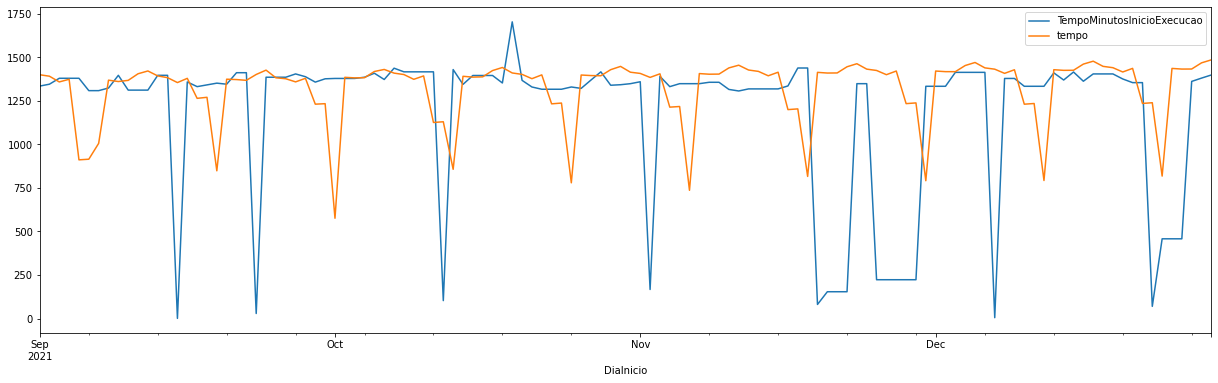

In [ ]:
pd.concat([test_set, future_forecast], axis=1).plot()

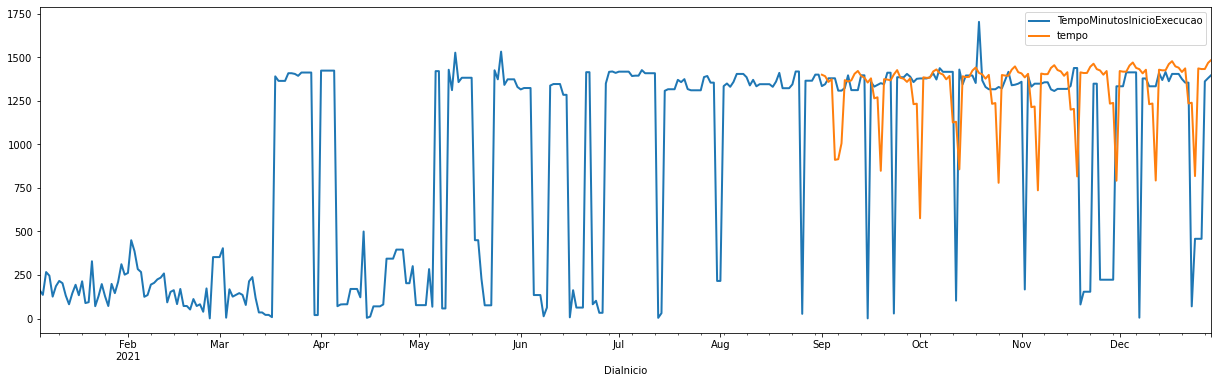

In [ ]:
pd.concat([df, future_forecast], axis=1).plot(linewidth=2)